# Prediction using Supervised ML

In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing all libraries required for this task
import pandas as pd
import numpy as np
import seaborn as sns

#### 1] Data Importing

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully!")

Data imported successfully!


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### 2] Data Visualization

##### Some Seaborn library's plot for plotting linear regression problem.

1) Pairplot

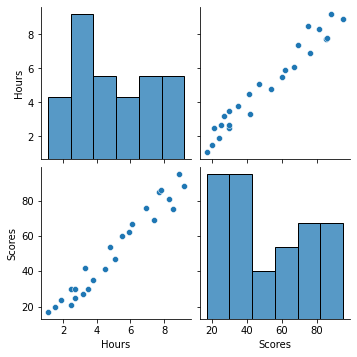

In [4]:
sns.pairplot(df)

2) Jointplot

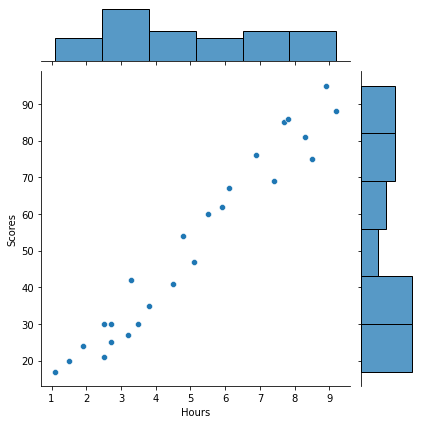

In [5]:
sns.jointplot(x="Hours",y="Scores",data=df)

3) Lmplot

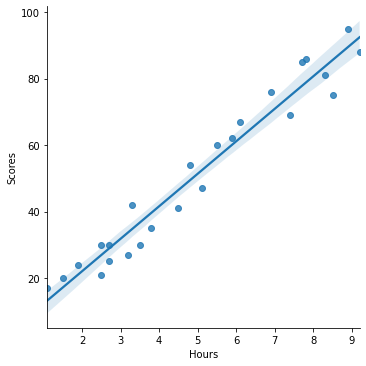

In [6]:
sns.lmplot(x="Hours",y="Scores",data=df)

4) Regplot

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

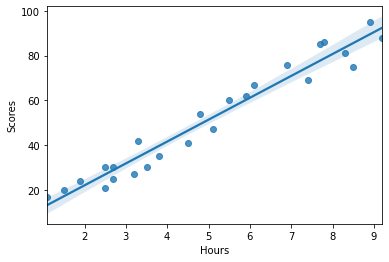

In [7]:
sns.regplot(x="Hours",y="Scores",data=df)

5) Stripplot

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

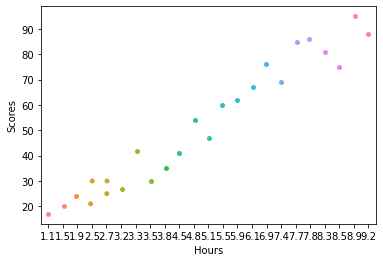

In [8]:
sns.stripplot(x="Hours",y="Scores",data=df)

6) Swarmplot

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

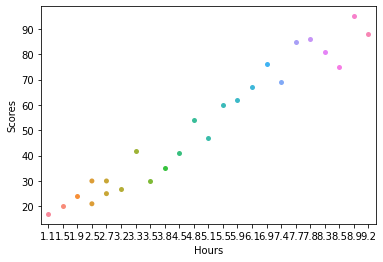

In [9]:
sns.swarmplot(x="Hours",y="Scores",data=df)

##### From the above graph I can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#### 3) Data Preparation

In [10]:
x=df.iloc[:,:-1].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y=df.iloc[:,1].values

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that I have attributes and labels, the next step is to split this data into training and test sets. so using Scikit-Learn's built-in train test_split() method.

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.256,random_state=0)

In [15]:
x_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [16]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [17]:
y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [18]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

#### 4) Training the Algorithm

Data splitted successfully. now it's time to train algorithm.

In [19]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
print("Training is complete")

Training is complete


##### Plotting the regression line

In [20]:
line= lr.coef_ * x + lr.intercept_

##### Plotting for the test data

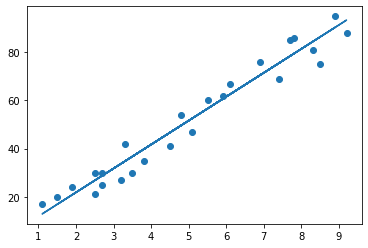

In [21]:
import matplotlib.pyplot as plt  
%matplotlib inline
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

#### 5] Making Predictions

Now algorithm is ready to make some predictions.

In [22]:
print(x_test)
y_pred=lr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [23]:
new_df=pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred})
new_df

,Actual value,Predicted value
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Now it's time to do prediction on some random data.


In [24]:
hrs=float(input("Enter study hours: "))
eqa=lr.coef_ * hrs + lr.intercept_
print("If you study for ",hrs,"Hours","you will score percentage.",eqa)

Enter study hours: 4.5
If you study for  4.5 Hours you will score percentage. [46.66975678]


#### Evaluating the model

In [25]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.130879918502482


#### Error for specific test size

0.3=4.41

0.2=4.18

0.25=4.13

0.4=4.89

0.29=4.41

0.26=4.1308

so th final test size=0.2